<a href="https://colab.research.google.com/github/pranitha2144/Internship-iith/blob/Resnet/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import keras
from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [45]:
trdata = ImageDataGenerator(
    
    )
traindata = trdata.flow_from_directory(directory="/content/drive/My Drive/data_ouput/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/drive/My Drive/data_ouput/val", target_size=(224,224))

Found 800 images belonging to 4 classes.
Found 100 images belonging to 4 classes.


In [46]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet', include_top=True)

In [47]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [48]:
for layers in (vggmodel.layers)[:19]:
    print(layers)
    layers.trainable = False

In [49]:
X= vggmodel.layers[-2].output
predictions = Dense(4, activation="softmax")(X)
model_final = Model(input = vggmodel.input, output = predictions)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.RMSprop(lr=0.00001), metrics=["accuracy"])

In [52]:
model_final.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [53]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=40, verbose=1, mode='auto')
hist=model_final.fit_generator(generator= traindata, steps_per_epoch= 2, epochs= 100, validation_data= testdata, validation_steps=1, callbacks=[checkpoint,early])
model_final.save_weights("vgg16_1.h5")

Epoch 1/100
2/2 [==============================] - 52s 26s/step - loss: 1.9646 - accuracy: 0.3438 - val_loss: 1.3302 - val_accuracy: 0.4375
Epoch 2/100


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


2/2 [==============================] - 51s 25s/step - loss: 1.1143 - accuracy: 0.5156 - val_loss: 0.8289 - val_accuracy: 0.6562
Epoch 3/100
2/2 [==============================] - 51s 25s/step - loss: 0.7560 - accuracy: 0.6250 - val_loss: 0.7570 - val_accuracy: 0.6875
Epoch 4/100
2/2 [==============================] - 37s 18s/step - loss: 0.7555 - accuracy: 0.7188 - val_loss: 0.5743 - val_accuracy: 0.7500
Epoch 5/100
2/2 [==============================] - 50s 25s/step - loss: 0.5036 - accuracy: 0.8594 - val_loss: 0.7221 - val_accuracy: 0.5938
Epoch 6/100
2/2 [==============================] - 52s 26s/step - loss: 0.5130 - accuracy: 0.8281 - val_loss: 0.5219 - val_accuracy: 0.7500
Epoch 7/100
2/2 [==============================] - 50s 25s/step - loss: 0.5439 - accuracy: 0.8125 - val_loss: 0.4165 - val_accuracy: 0.8438
Epoch 8/100
2/2 [==============================] - 36s 18s/step - loss: 0.5285 - accuracy: 0.8281 - val_loss: 0.8262 - val_accuracy: 0.5000
Epoch 9/100
2/2 [===============

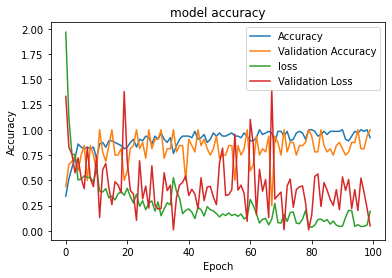

In [54]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [55]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

test_datagen = ImageDataGenerator()

In [56]:
validation_generator = test_datagen.flow_from_directory('/content/drive/My Drive/data_ouput/test',
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 100 images belonging to 4 classes.


In [57]:
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model_final.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['grade0', 'grade1', 'grade2','grade3']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[ 7  8  8  2]
 [ 2 14  5  4]
 [ 5  9  7  4]
 [ 7 10  5  3]]
Classification Report
              precision    recall  f1-score   support

      grade0       0.33      0.28      0.30        25
      grade1       0.34      0.56      0.42        25
      grade2       0.28      0.28      0.28        25
      grade3       0.23      0.12      0.16        25

    accuracy                           0.31       100
   macro avg       0.30      0.31      0.29       100
weighted avg       0.30      0.31      0.29       100



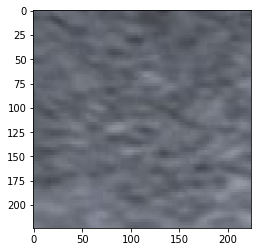

In [61]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

img = image.load_img("/content/drive/My Drive/data_ouput/test/grade1/grade1-079.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

In [62]:
output = model_final.predict(img)

In [63]:
output
ans='grade'+str(np.argmax(output[0],axis=0))
print(ans)

grade1


In [65]:
import os
data_path='/content/drive/My Drive/data_ouput/test'
data_dir_list=os.listdir(data_path)
for dataset in data_dir_list:
  print(dataset)
  img_list=os.listdir(data_path+'/'+dataset)
  correctCount=0
  wrongCount=0
  for img in img_list:
    img_path=data_path+'/'+dataset+'/'+img
    input_image = image.load_img(img_path,target_size=(224,224))
    input_image = np.asarray(input_image)
    input_image = np.expand_dims(input_image, axis=0)
    output = model_final.predict(input_image)
    ans='grade'+str(np.argmax(output[0],axis=0))
    if( ans in img):
      correctCount+=1
    else:
      wrongCount+=1
  print("correct Count {} WrongCount {}".format(correctCount,wrongCount))




grade1
correct Count 24 WrongCount 1
grade0
correct Count 21 WrongCount 4
grade2
correct Count 23 WrongCount 2
grade3
correct Count 13 WrongCount 12


In [42]:
model_final.save('modelbest.h5')